In [34]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

In [2]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race', 'sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [3]:
# reading the data
df_train = pd.read_csv('dataset/adult.data.txt', header=None, names=cols)
df_test = pd.read_csv('dataset/adult.test.txt', header=None, names=cols)

In [4]:
df_test = df_test.drop(0)

### Data Preprocessing

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
age               16281 non-null object
workclass         16281 non-null object
fnlwgt            16281 non-null float64
education         16281 non-null object
education-num     16281 non-null float64
marital-status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null float64
capital-loss      16281 non-null float64
hours-per-week    16281 non-null float64
native-country    16281 non-null object
income            16281 non-null object
dtypes: float64(5), object(10)
memory usage: 2.0+ MB


In [7]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [9]:
df_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df_test['age'].unique()

array(['25', '38', '28', '44', '18', '34', '29', '63', '24', '55', '65',
       '36', '26', '58', '48', '43', '20', '37', '40', '72', '45', '22',
       '23', '54', '32', '46', '56', '17', '39', '52', '21', '42', '33',
       '30', '47', '41', '19', '69', '50', '31', '59', '49', '51', '27',
       '57', '61', '64', '79', '73', '53', '77', '80', '62', '35', '68',
       '66', '75', '60', '67', '71', '70', '90', '81', '74', '78', '82',
       '83', '85', '76', '84', '89', '88', '87'], dtype=object)

In [11]:
df_test.describe()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [12]:
test_age = pd.to_numeric(df_test['age'])
df_test['age'] = test_age

In [13]:
df_test.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [14]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
lol = []
lol = list(df_train.loc[:,df_train.dtypes==object].columns)
lol

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# Multi Lable Encoder for Dataframe
class MultiLabelEncoder:
    '''
    LabelEncodes() the 'object' type columns in the dataframe.
    
    ----------------------------Parameters------------------------------
    X: dataframe
    columns: column names of the dataFrame that are to be LabelEncoded()
    
    ----------------------------Variables------------------------------    
    _object_type_columns: returns all the object-type columns in the dataframe 
    '''
    def __init__(self,X ,columns=None):
        
        if X is not None:
            _object_type_columns_ = list(X.loc[:,X.dtypes==object].columns)
            
            if columns is not None:
                self.columns = columns
            else:
                self.columns = X.loc[:,X.dtypes==object].columns
        else:
            self.columns = columns
        
    def helper(self, X,y=None): #Not relevant
        '''Helper function'''
        _object_type_columns_ = list(X.loc[:,X.dtypes==object].columns)
        return self 
    
    def transform(self, X,):
        '''
        Transforms specified 'columns' using
        LabelEncoder(). If no columns are specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output
    def fit_transform(self, X, y=None):
        return self.helper(X,y).transform(X)

In [18]:
encoder = MultiLabelEncoder(df_train)

In [19]:
train = encoder.fit_transform(df_train)

In [20]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [21]:
test = encoder.transform(df_test)

In [22]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,4,226802.0,1,7.0,4,7,3,2,1,0.0,0.0,40.0,38,0
2,38,4,89814.0,11,9.0,2,5,0,4,1,0.0,0.0,50.0,38,0
3,28,2,336951.0,7,12.0,2,11,0,4,1,0.0,0.0,40.0,38,1
4,44,4,160323.0,15,10.0,2,7,0,2,1,7688.0,0.0,40.0,38,1
5,18,0,103497.0,15,10.0,4,0,3,4,0,0.0,0.0,30.0,38,0


In [23]:
# income mapping
# { <=50k:0 , >50k:1 }

In [43]:
X_train = train.drop('income', axis=1)
X_test = test.drop('income', axis=1)
y_train = train['income']
y_test = test['income']

In [44]:
# feautures scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
from sklearn.model_selection import RepeatedStratifiedKFold
kfold = RepeatedStratifiedKFold(random_state=101)

In [47]:
from sklearn.model_selection import cross_val_score

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier

In [76]:
models = []
models.append(['LR', LogisticRegression()])
models.append(['GNB', GaussianNB()])
models.append(['DT', DecisionTreeClassifier()])
models.append(['RF', RandomForestClassifier(n_estimators=100)])
models.append(['AB', AdaBoostClassifier()])
models.append(['GB', GradientBoostingClassifier(n_estimators=1000)])
models.append(['QDA', QuadraticDiscriminantAnalysis()])
models.append(['LDA', LinearDiscriminantAnalysis()])
models.append(['NN', MLPClassifier()])

In [77]:
results = []
names = []
for name, model in models:
    print('========================= '+name+' =========================')
    print('training started... ')
    result = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print('...training finished')
    names.append(name)
    results.append([np.mean(result), np.std(result)])
    print('Results:')
    print('Mean: '+ str(np.mean(result)))
    print('SD:' + str(np.std(result)))

========================= LR =========================
training started... 
training finished... 
Results:
Mean: 0.8247781888500451
SD:0.003625514872391149
========================= GNB =========================
training started... 
training finished... 
Results:
Mean: 0.8037867819454645
SD:0.003753505614905914
========================= DT =========================
training started... 
training finished... 
Results:
Mean: 0.8107522127357457
SD:0.004061609825663254
========================= RF =========================
training started... 
training finished... 
Results:
Mean: 0.8572802622877473
SD:0.0031369908494820378
========================= AB =========================
training started... 
training finished... 
Results:
Mean: 0.8597802547428297
SD:0.004584168456823348
========================= GB =========================
training started... 
training finished... 
Results:
Mean: 0.870996095599389
SD:0.004633469521797274
========================= QDA =========================
trainin

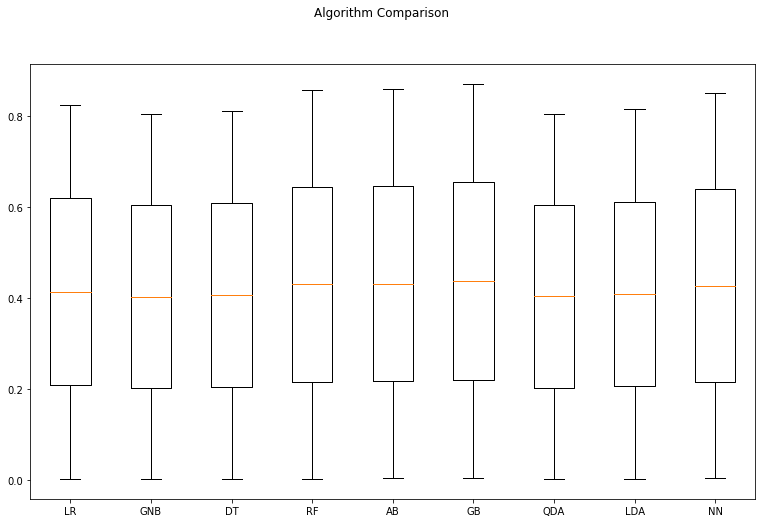

In [78]:
fig = plt.figure(figsize=(13, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [87]:
gbc = GradientBoostingClassifier(n_estimators=1000)

In [88]:
# training
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [89]:
predict = gbc.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(predict, y_test))
print(classification_report(predict, y_test))

[[11534  1394]
 [  901  2452]]
             precision    recall  f1-score   support

          0       0.93      0.89      0.91     12928
          1       0.64      0.73      0.68      3353

avg / total       0.87      0.86      0.86     16281

